In [1]:
## Exercises

### Part 1

#Continue in your `classification_exercises.ipynb` notebook. As always, add, commit, and push your changes.

#**Section 1 - iris_db:** Using iris data from our mySQL server and the methods used in the lesson above: 

#1. Acquire, prepare & split your data. 

#2. Univariate Stats

 #   - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()). 

  #  - For each species (categorical variable): create a frequency table and a bar plot of those frequencies. 

   # - Document takeaways & any actions. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import acquire_data
import prepare_data

###### Step 1
## Run all imports

In [3]:
###### Step 2
## use the acquire_data file with .get_irisdata()

iris_df = acquire_data.get_iris_data()

In [4]:
##### Step 3
# now that data is acquired then prepare using the prepare_data file .prep_iris(iris_df)
# into the 
# train, validate, test = 
train, validate, test = prepare_data.prep_iris(iris_df)


In [5]:
# call on each set using train. to begin exploring
train.head()


,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [6]:
###### Step 4
## make sure there are no duplicates run drop_duplicates script
train.shape

(84, 8)

In [7]:
iris_df = iris_df.drop_duplicates()

In [8]:
## confirm no dulpicates
train.shape

(84, 8)

In [9]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [10]:
# shape
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [11]:
train.describe(include='all')

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,versicolor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,NaN,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,NaN,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,NaN,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,NaN,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,NaN,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000


In [12]:
### Immediate notes
# - avg Sepal Length is - 5.8
# - avg Sepal Width is - 3.07
# - avg Petal Length is - 3.77
# - avg Petal Width is - 1.20
# - 84 species and 3 are unique

In [13]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


sepal_length


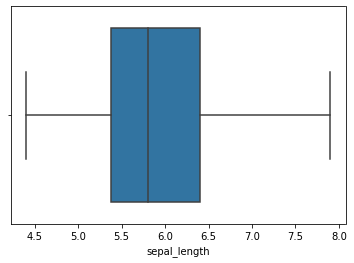

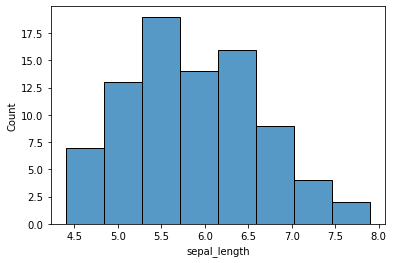

sepal_width


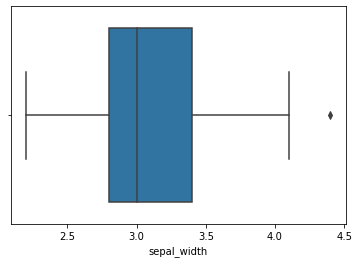

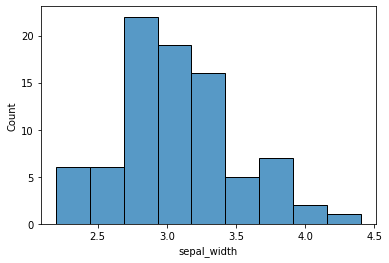

petal_length


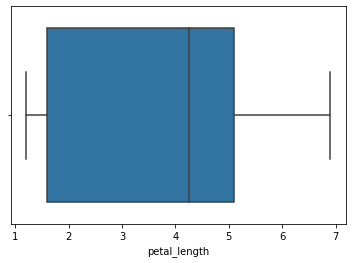

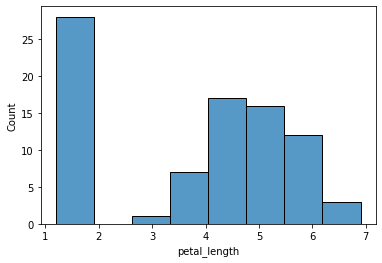

petal_width


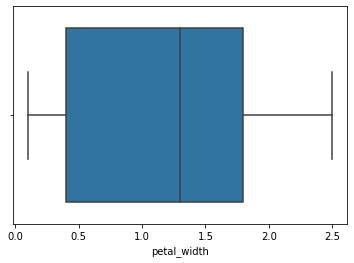

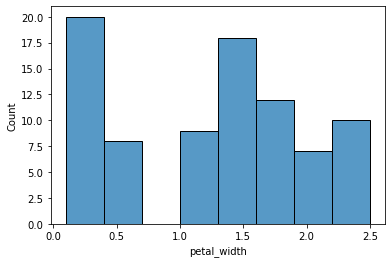

In [18]:
num_vars1 = train.columns[[train[col].dtype == 'float64' for col in train.columns]]


for col in num_vars1:
    print(col)
    sns.boxplot(x=col, data=train)
    plt.show()
    sns.histplot(x=col, data=train)
    plt.show()




# bar plot
#sns.countplot(x=‘species’, data=train)

setosa
0    56
1    28
Name: setosa, dtype: int64
0    66.666667
1    33.333333
Name: setosa, dtype: float64


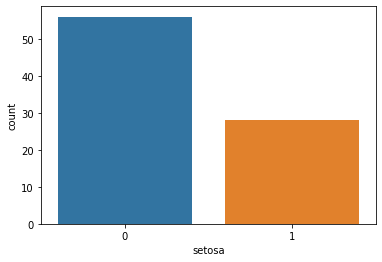

versicolor
0    56
1    28
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


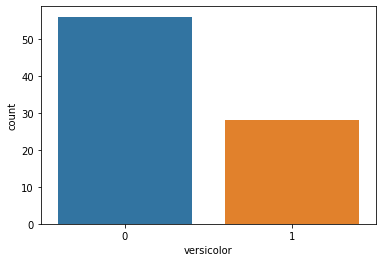

virginica
0    56
1    28
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


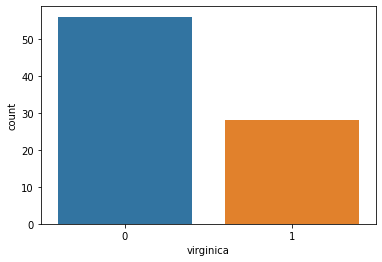

In [19]:
cat_vars1 = ['setosa', 'versicolor', 'virginica']

for col in cat_vars1:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

sepal_length
5.0    7
6.4    7
5.7    6
5.8    6
6.3    5
5.4    5
6.9    4
5.5    4
6.0    3
4.8    3
5.1    3
5.6    3
5.9    3
7.2    3
6.7    3
6.2    2
4.9    2
6.1    2
6.5    2
4.6    2
7.9    1
4.5    1
5.2    1
5.3    1
4.4    1
7.3    1
7.7    1
6.8    1
6.6    1
Name: sepal_length, dtype: int64
5.0    8.333333
6.4    8.333333
5.7    7.142857
5.8    7.142857
6.3    5.952381
5.4    5.952381
6.9    4.761905
5.5    4.761905
6.0    3.571429
4.8    3.571429
5.1    3.571429
5.6    3.571429
5.9    3.571429
7.2    3.571429
6.7    3.571429
6.2    2.380952
4.9    2.380952
6.1    2.380952
6.5    2.380952
4.6    2.380952
7.9    1.190476
4.5    1.190476
5.2    1.190476
5.3    1.190476
4.4    1.190476
7.3    1.190476
7.7    1.190476
6.8    1.190476
6.6    1.190476
Name: sepal_length, dtype: float64


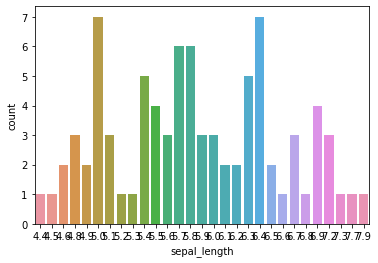

sepal_width
3.0    13
2.8     8
3.4     8
2.7     7
2.9     7
3.1     6
3.2     6
3.8     4
2.6     3
2.5     3
3.5     3
2.3     3
3.9     2
3.3     2
3.6     2
2.4     2
4.4     1
4.1     1
3.7     1
4.0     1
2.2     1
Name: sepal_width, dtype: int64
3.0    15.476190
2.8     9.523810
3.4     9.523810
2.7     8.333333
2.9     8.333333
3.1     7.142857
3.2     7.142857
3.8     4.761905
2.6     3.571429
2.5     3.571429
3.5     3.571429
2.3     3.571429
3.9     2.380952
3.3     2.380952
3.6     2.380952
2.4     2.380952
4.4     1.190476
4.1     1.190476
3.7     1.190476
4.0     1.190476
2.2     1.190476
Name: sepal_width, dtype: float64


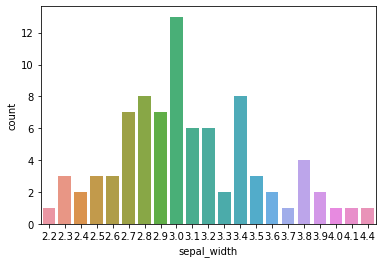

petal_length
5.1    6
1.5    6
1.6    5
1.4    5
4.5    4
4.2    4
1.7    4
5.6    4
1.3    4
4.6    3
4.0    3
4.3    2
5.8    2
1.2    2
4.1    2
5.5    2
4.9    2
4.8    2
3.9    2
6.0    2
5.2    2
5.3    2
1.9    2
5.0    1
6.1    1
6.3    1
3.7    1
6.9    1
3.5    1
5.7    1
4.4    1
3.3    1
6.4    1
5.4    1
4.7    1
Name: petal_length, dtype: int64
5.1    7.142857
1.5    7.142857
1.6    5.952381
1.4    5.952381
4.5    4.761905
4.2    4.761905
1.7    4.761905
5.6    4.761905
1.3    4.761905
4.6    3.571429
4.0    3.571429
4.3    2.380952
5.8    2.380952
1.2    2.380952
4.1    2.380952
5.5    2.380952
4.9    2.380952
4.8    2.380952
3.9    2.380952
6.0    2.380952
5.2    2.380952
5.3    2.380952
1.9    2.380952
5.0    1.190476
6.1    1.190476
6.3    1.190476
3.7    1.190476
6.9    1.190476
3.5    1.190476
5.7    1.190476
4.4    1.190476
3.3    1.190476
6.4    1.190476
5.4    1.190476
4.7    1.190476
Name: petal_length, dtype: float64


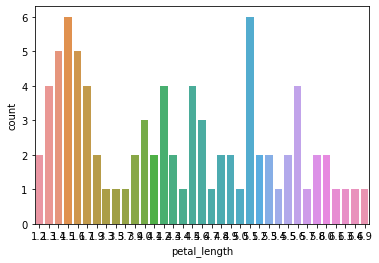

petal_width
0.2    14
1.3    10
1.8     9
1.5     7
0.4     6
2.3     5
1.0     4
1.2     4
0.3     4
2.1     3
1.6     3
0.1     2
2.5     2
2.4     2
1.9     2
2.0     2
0.5     1
1.1     1
0.6     1
1.4     1
2.2     1
Name: petal_width, dtype: int64
0.2    16.666667
1.3    11.904762
1.8    10.714286
1.5     8.333333
0.4     7.142857
2.3     5.952381
1.0     4.761905
1.2     4.761905
0.3     4.761905
2.1     3.571429
1.6     3.571429
0.1     2.380952
2.5     2.380952
2.4     2.380952
1.9     2.380952
2.0     2.380952
0.5     1.190476
1.1     1.190476
0.6     1.190476
1.4     1.190476
2.2     1.190476
Name: petal_width, dtype: float64


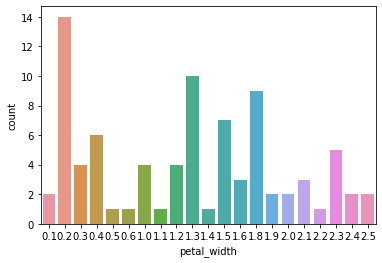

In [20]:
for col in num_vars1:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

setosa


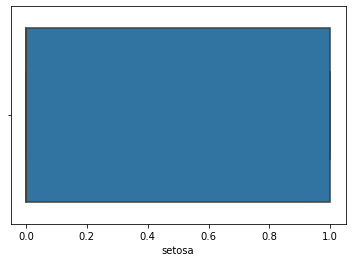

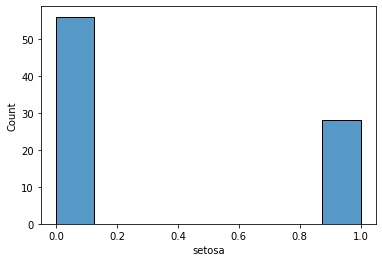

versicolor


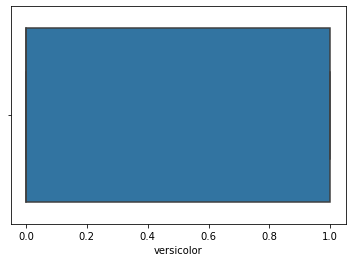

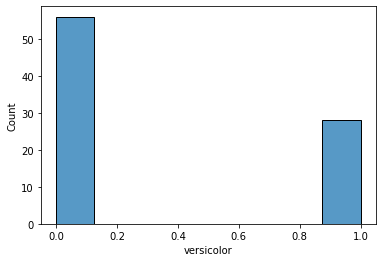

virginica


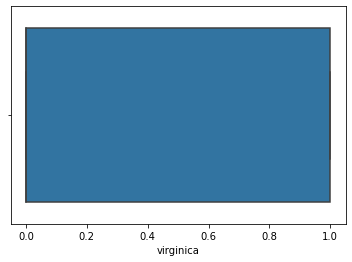

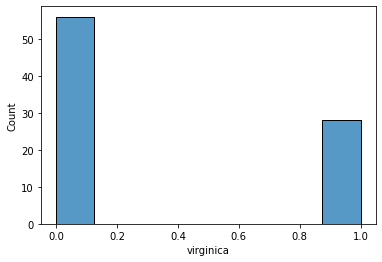

In [21]:
for col in cat_vars1:
    print(col)
    sns.boxplot(x=col, data=train)
    plt.show()
    sns.histplot(x=col, data=train)
    plt.show()

<AxesSubplot:xlabel='species', ylabel='count'>

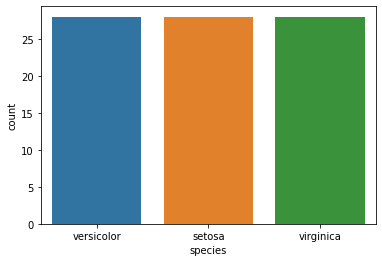

In [22]:
sns.countplot(x= 'species', data=train)

In [23]:

#2. Bivariate Stats

#    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis). 

#    - For each measurement type, compute the descriptive statistics for each species. 

#    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types. 

#    - Document takeaways & any actions. 

In [30]:
#plt.scatter(smokers.total_bill, smokers.tip)

#plt.scatter(non_smokers.total_bill, non_smokers.tip)

#sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', palette= ['r', 'blue'])



#sns.displot(data = tips, x = 'total_bill', kde = True, rug= True)


#sns.displot(data = tips, x = 'total_bill', hue = 'sex',
#          multiple = 'stack')

# bar plot 'tip' by gender. Shows mean for each category instead with CI

#sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'time')

<AxesSubplot:title={'center':'Virginica has highest mean sepal length'}, xlabel='species', ylabel='sepal_length'>

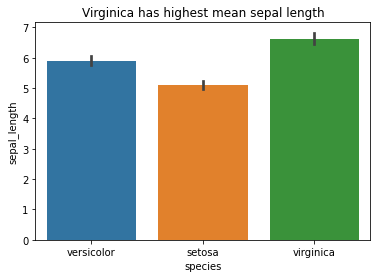

In [31]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI
plt.title('Virginica has highest mean sepal length')
mean_sepal_length = train.sepal_length.mean()
#plt.axhline(mean_sepal_length, label='Mean Sepal Length',  )
sns.barplot(data = train, y = 'sepal_length', x = 'species')


<AxesSubplot:title={'center':'Setosa has highest mean sepal width'}, xlabel='species', ylabel='sepal_width'>

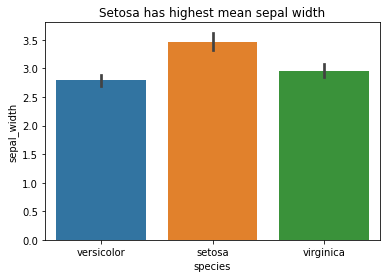

In [32]:
plt.title('Setosa has highest mean sepal width')
mean_sepal_width = train.sepal_width.mean()
#plt.axhline(mean_sepal_length, label='Mean Sepal Length',  )

sns.barplot(data = train, y = 'sepal_width', x = 'species')

<AxesSubplot:title={'center':'Virginica has highest mean petal length'}, xlabel='species', ylabel='petal_length'>

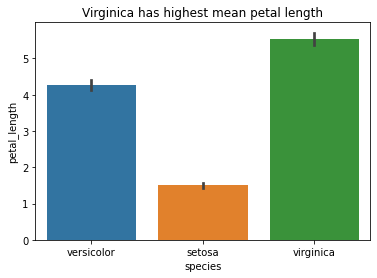

In [33]:
plt.title('Virginica has highest mean petal length')
mean_petal_length = train.petal_length.mean()
#plt.axhline(mean_sepal_length, label='Mean Sepal Length',  )

sns.barplot(data = train, y = 'petal_length', x = 'species')

<AxesSubplot:title={'center':'Virginica has highest mean petal width'}, xlabel='species', ylabel='petal_width'>

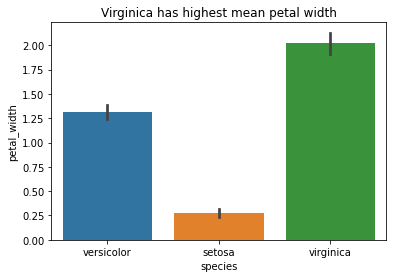

In [34]:
plt.title('Virginica has highest mean petal width')
mean_petal_width = train.petal_width.mean()
#plt.axhline(mean_sepal_length, label='Mean Sepal Length',  )

sns.barplot(data = train, y = 'petal_width', x = 'species')

In [57]:
# setosa species can be identified wide sepal small petals
# feature engineering creates new columns that combine other columns


In [35]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

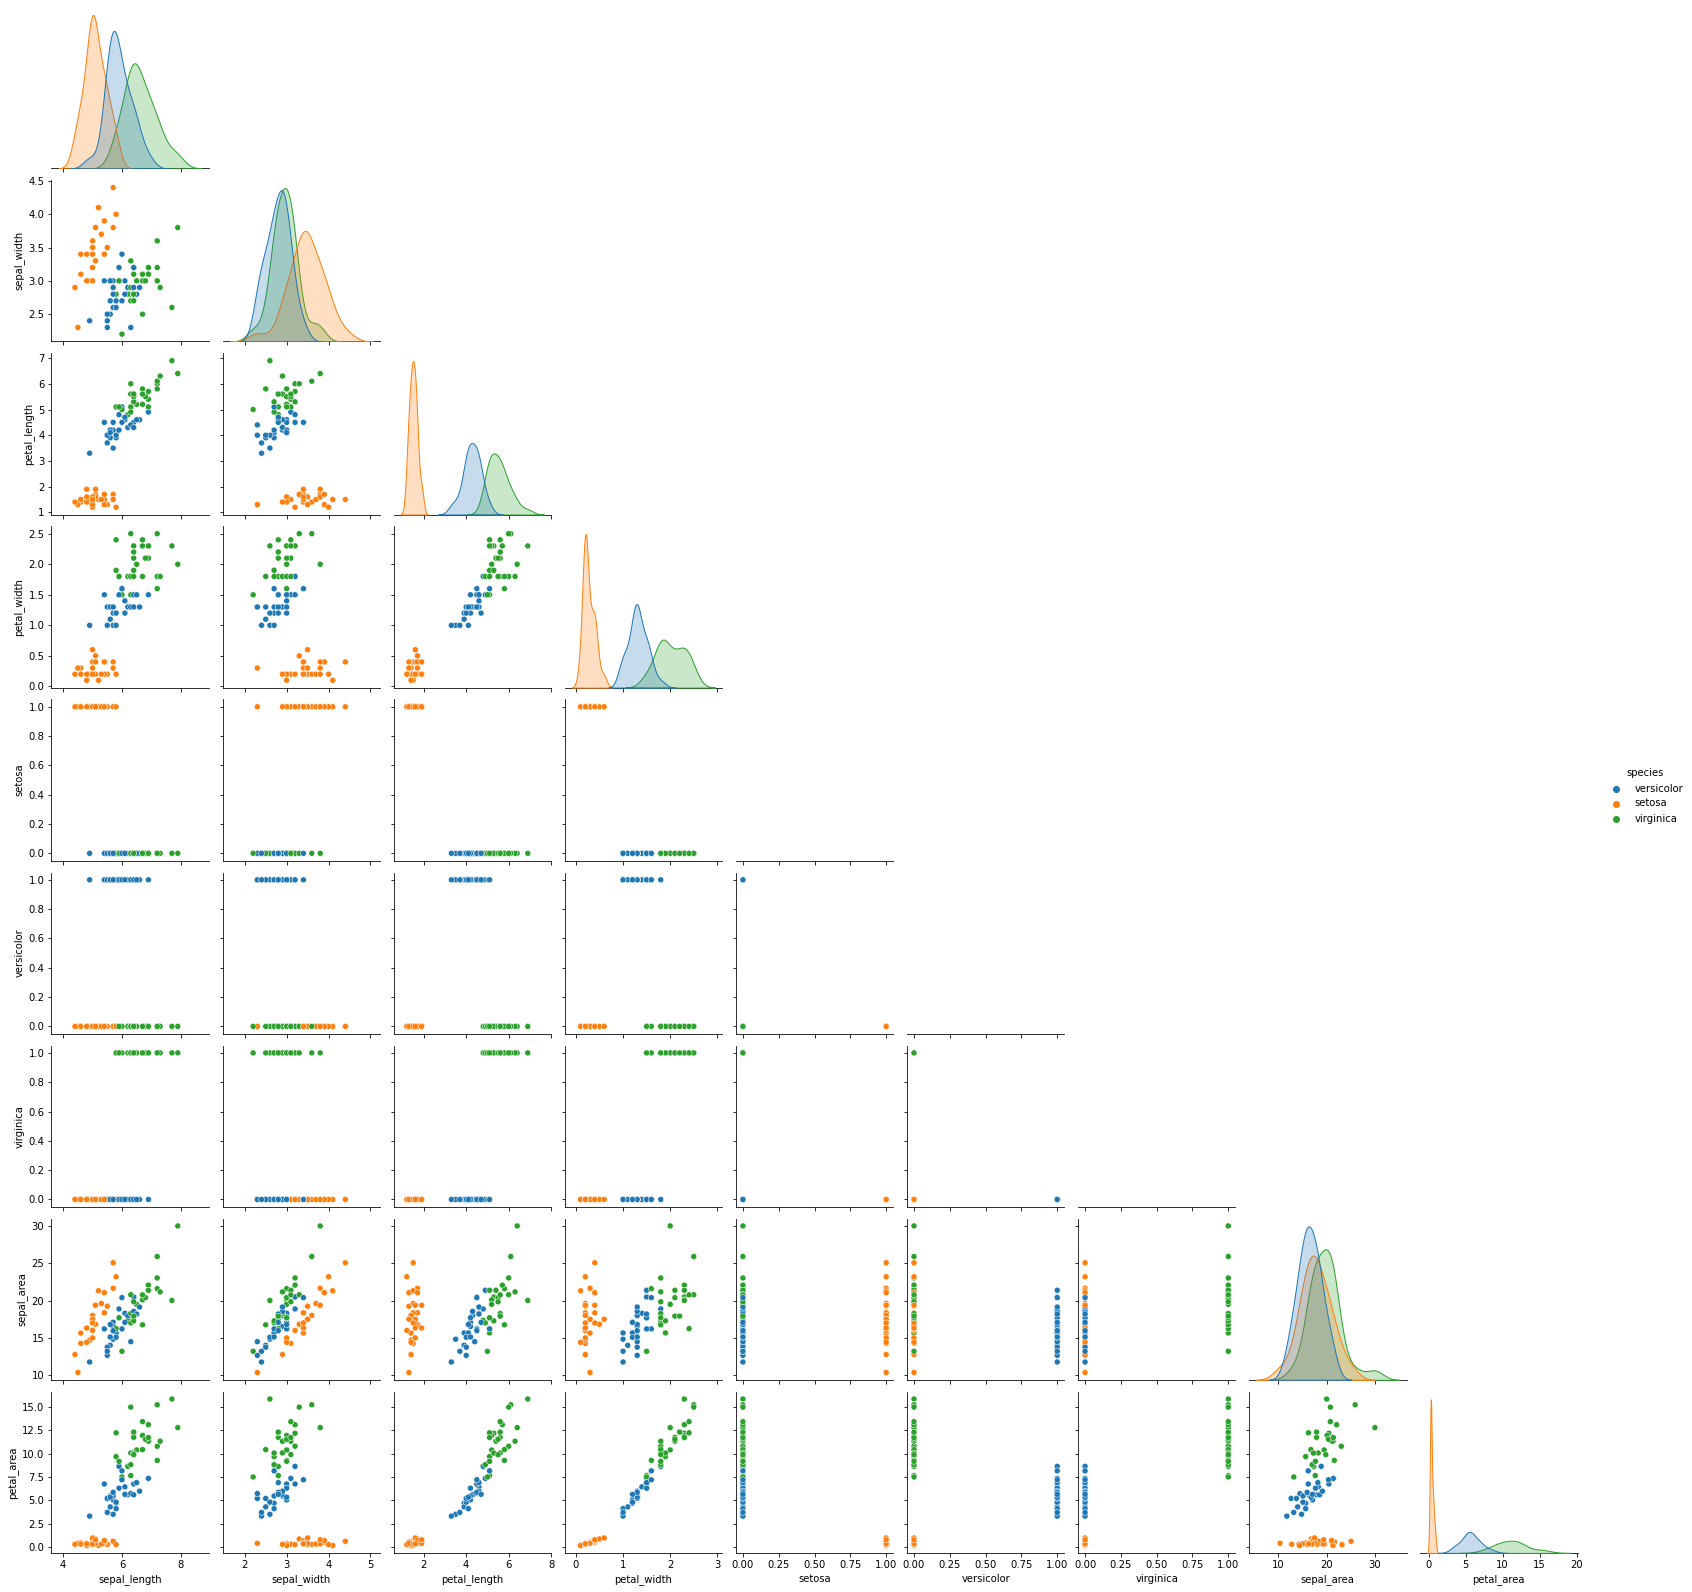

In [36]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

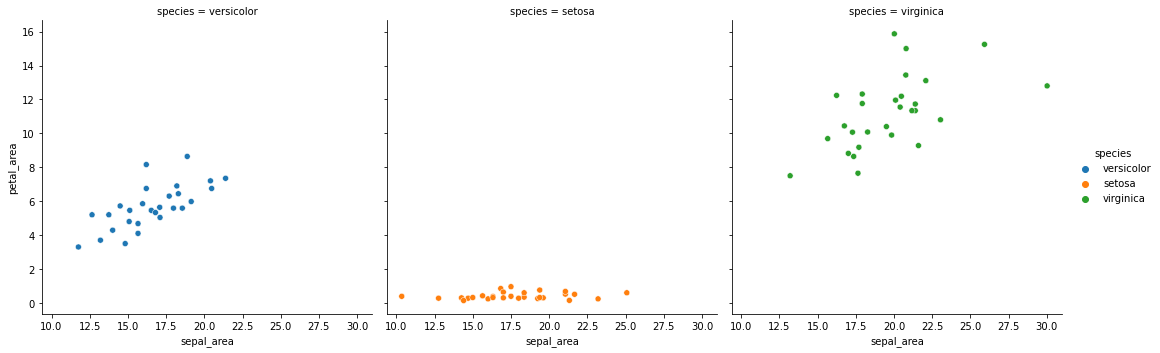

In [38]:
sns.relplot(data = train, x = 'sepal_area', y = 'petal_area', hue = 'species', col = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

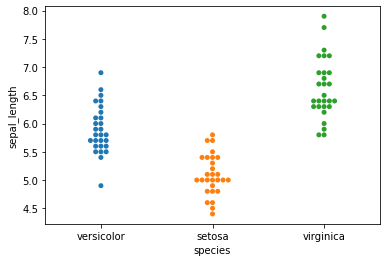

In [40]:
sns.swarmplot(data=train, x='species', y='sepal_length')

In [41]:
train_melt = train.melt(id_vars= 'species')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

<AxesSubplot:xlabel='variable', ylabel='value'>

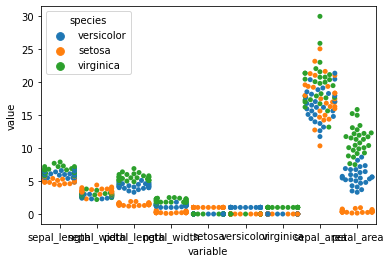

In [42]:
sns.swarmplot(data=train_melt, x = 'variable', y = 'value', hue = 'species')

In [43]:
# run correlation plot to see 
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,-0.722317,0.024224,0.698093,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.623439,-0.442075,-0.181364,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,-0.928394,0.205008,0.723386,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,-0.877707,0.104650,0.773058,0.299920,0.982404
setosa,-0.722317,0.623439,-0.928394,-0.877707,1.000000,-0.500000,-0.500000,-0.052203,-0.816541
versicolor,0.024224,-0.442075,0.205008,0.104650,-0.500000,1.000000,-0.500000,-0.320752,-0.015033
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,-0.500000,1.000000,0.372955,0.831575
sepal_area,0.619853,0.673554,0.271618,0.299920,-0.052203,-0.320752,0.372955,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,-0.816541,-0.015033,0.831575,0.373870,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

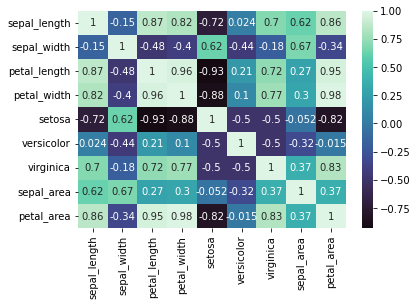

In [46]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show